<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/0204_maze_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
if [ ! -d utils ]; then
    mkdir utils
fi
cd utils
if [ ! -f disjointset.py ]; then
    curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/disjointset.py
fi
if [ ! -f mazebuilder.py ]; then
    curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/mazebuilder.py
fi


In [2]:
from utils.mazebuilder import makeMaze
import matplotlib.pyplot as plt

In [3]:
maze = makeMaze(4, 8)
print(maze)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


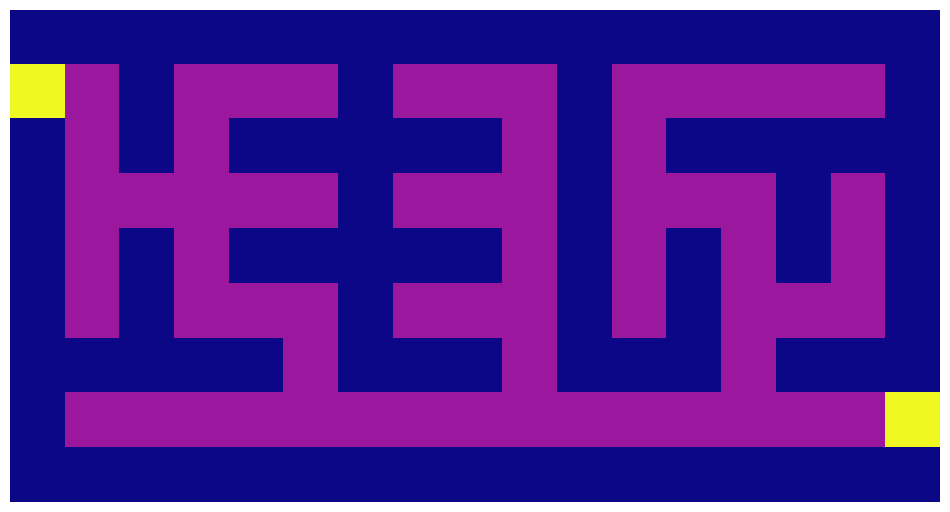

In [4]:
def showMaze(maze, size=(12, 12)):
    plt.subplots(figsize=size)
    plt.imshow(maze, cmap="plasma")
    plt.axis("off")
    plt.show()

showMaze(maze)

In [5]:
#import pdb

def solve(maze, pos, exit):
    """
    pos: (row, col) for current position
    exit: (row, col) for the exit
    """
    #pdb.set_trace()
    maze[pos] = 3
    if pos == exit:
        showMaze(maze)
        return True

    r, c = pos
    nextPositions = [(r, c+1), (r+1, c), (r, c-1), (r-1, c)]
    for nextPos in nextPositions:
        if maze[nextPos] == 1 and solve(maze, nextPos, exit):
            return True

    maze[pos] = 2
    return False

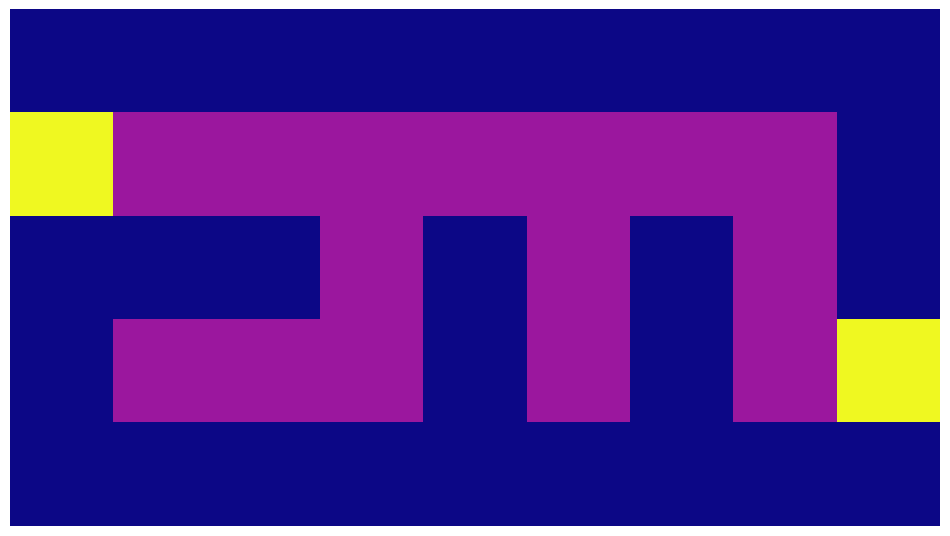

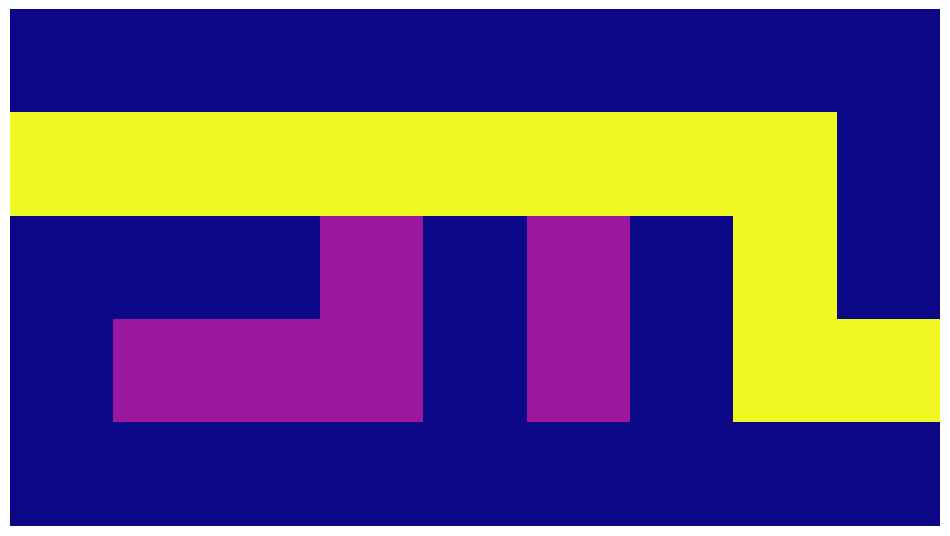

True

In [6]:
maze = makeMaze(2, 4)
showMaze(maze)
n, m = maze.shape
solve(maze, (1, 1), (n-2, m-2))

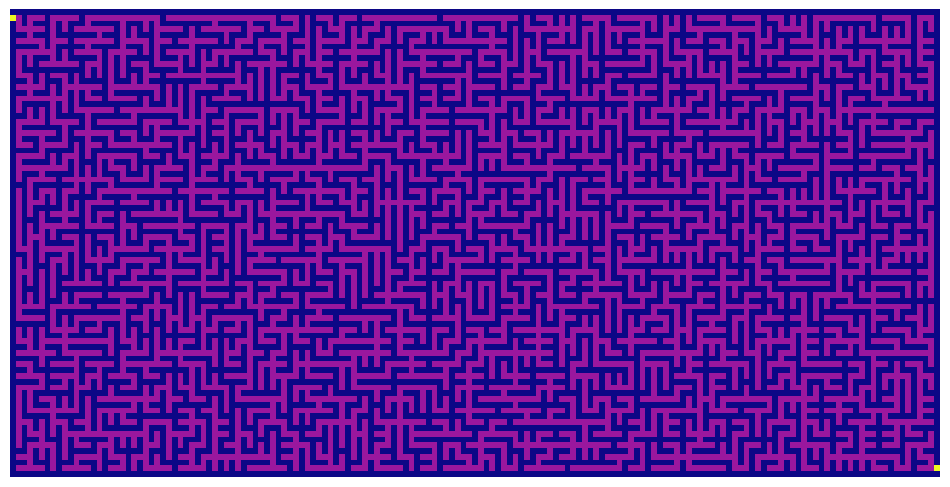

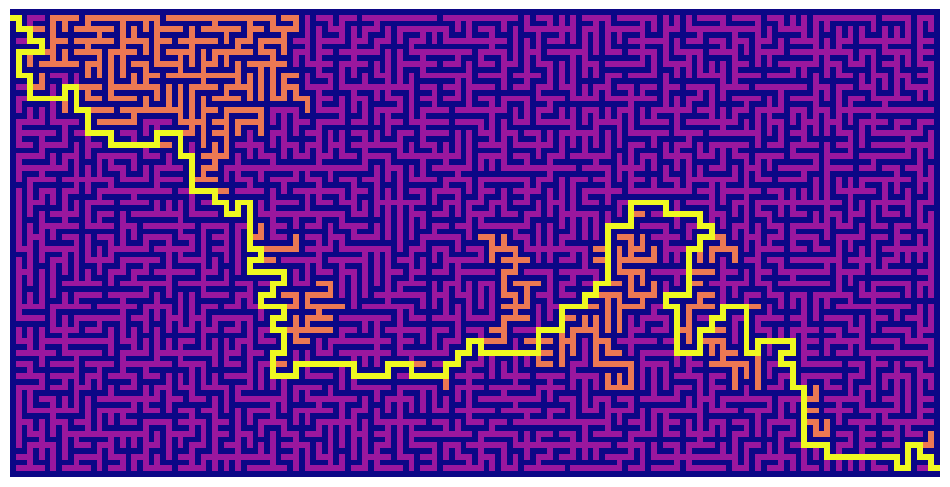

True

In [7]:
maze = makeMaze(40, 80)
showMaze(maze)
n, m = maze.shape
solve(maze, (1, 1), (n-2, m-2))

In [8]:
import sys
print(sys.getrecursionlimit())

1000


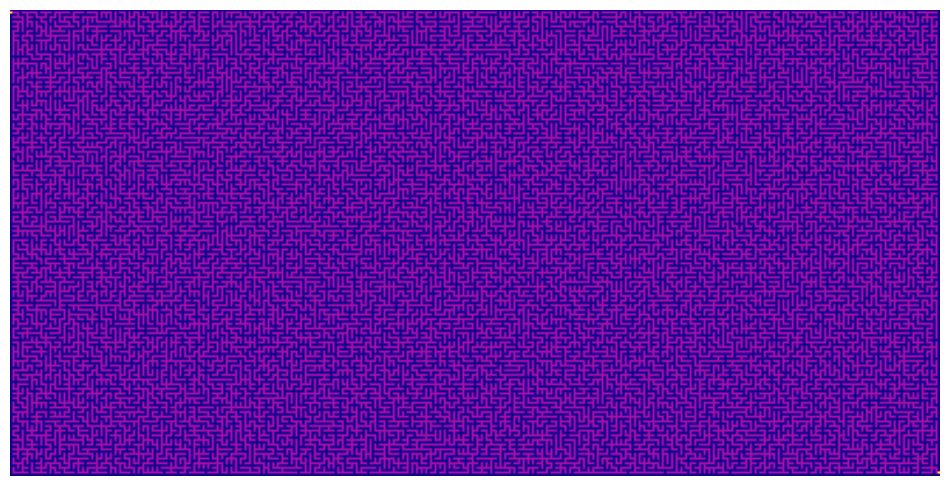

RecursionError: ignored

In [9]:
maze = makeMaze(100, 200)
showMaze(maze)
n, m = maze.shape
solve(maze.copy(), (1, 1), (n-2, m-2))

## No recursion solution

In [10]:
def solveNoRecursion(maze, pos0, exit):
    stack = [pos0]

    while stack:
        pos = stack[-1]
        if pos == exit:
            maze[pos] = 3
            showMaze(maze)
            return
        if maze[pos] == 1:
            maze[pos] = 3

            r, c = pos
            nextPositions = [(r, c+1), (r+1, c), (r, c-1), (r-1, c)]
            for nextPos in nextPositions:
                if maze[nextPos] == 1:
                    stack.append(nextPos)
        elif maze[pos] == 3:
            maze[pos] = 2
            stack.pop()

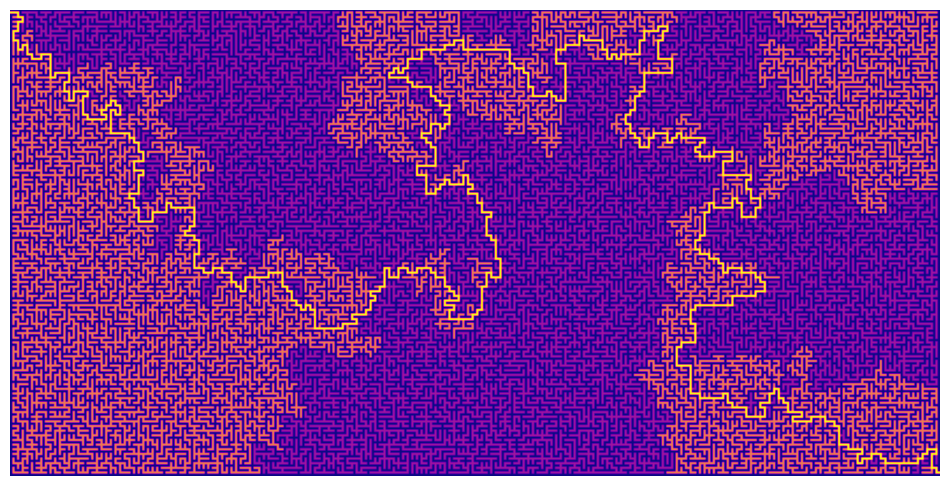

In [11]:
#showMaze(maze)
n, m = maze.shape
solveNoRecursion(maze.copy(), (1, 1), (n-2, m-2))

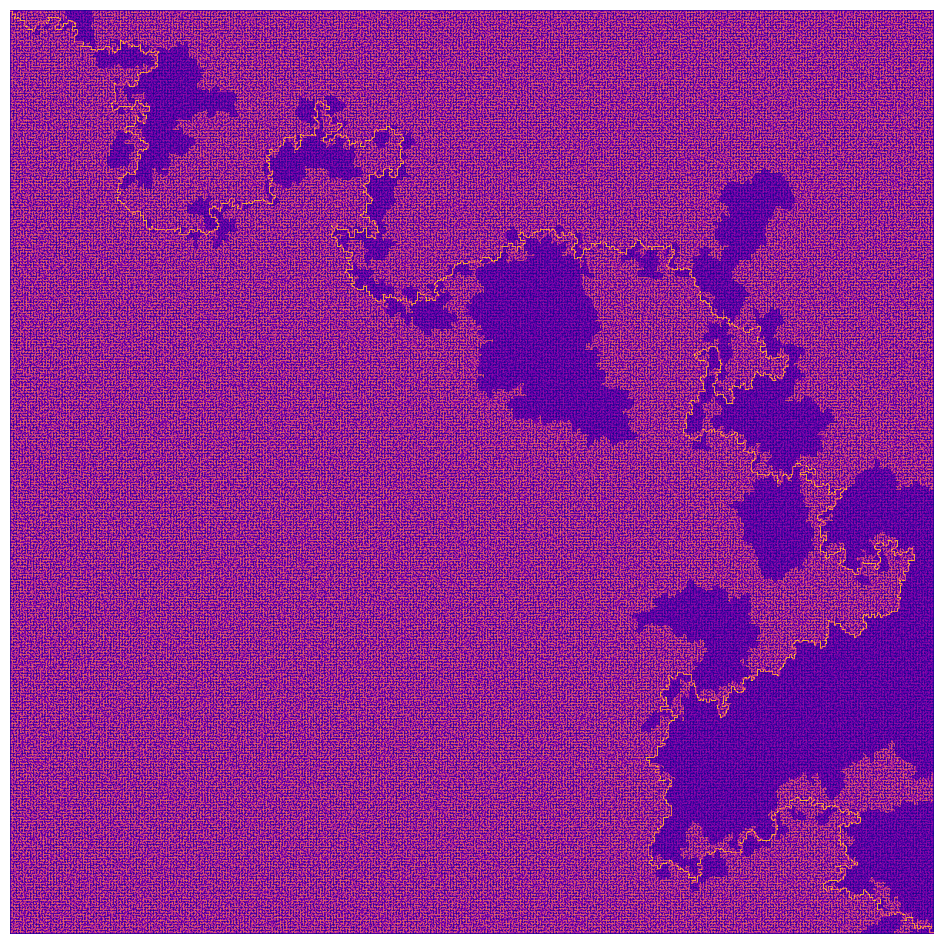

In [12]:
maze = makeMaze(600, 600)
#showMaze(maze)
n, m = maze.shape
solveNoRecursion(maze, (1, 1), (n-2, m-2))